In [3]:
import os; 
import healpy as hp; import numpy as np; 
from IPython.core.display import display, HTML; display(HTML("<style>.container { width:100% !important; }</style>"))
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
def make_ball(map_test1, cmap=cm.gray_r, clim=None, title='', rot = (0,-45,-20)):
    cmap.set_over('w')
    cmap.set_under('w')
    cmap.set_bad('lightgrey')
    dot_size=10
    if clim==None:
        hp.visufunc.orthview(map=map_test1, half_sky=True, title=title, rot=rot, cmap=cmap, cbar=True, hold=True, nest=False, notext=True);
    else:
        hp.visufunc.orthview(map=map_test1, half_sky=True, title=title, rot=rot, cmap=cmap, cbar=True, hold=True, nest=False, notext=True, min=clim[0], max=clim[1]);
    theta, phi = hp.pix2ang(hp.npix2nside(len(map_test1)), range(len(map_test1)), nest=True);
#     hp.projscatter(theta, phi, c='k', s=dot_size);
    hp.graticule();
#     hp.graticule(dmer=360,dpar=360,alpha=1, rot=(0,0,20), local=True);
    hp.graticule(dmer=360,dpar=360,alpha=1, rot=(0,0,-1*rot[2]), local=True);
#     pl.Circle((19, 12), 40, color='r')
#     hp.graticule(dmer=360,dpar=360,alpha=1, rot=(0,0,0), local=True);       
#     pl.savefig('test_fig1.pdf', bbox_inches='tight', transparent=True);

# DR1 mass map

In [5]:
from astropy.io import fits
map_des_dr1 = hp.read_map('./example_maps_data/map___EG=counts.fits')

/Users/tomek/python-venv/anaconda-2.4/anaconda/lib/python2.7/site-packages/astropy/table/np_utils.py:19: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _np_utils
/Users/tomek/python-venv/anaconda-2.4/anaconda/lib/python2.7/site-packages/astropy/io/ascii/fastbasic.py:9: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import cparser


NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


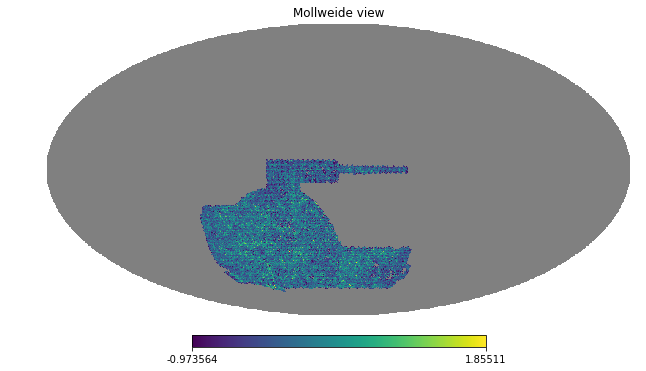

In [6]:
hp.mollview(map_des_dr1)

In [7]:
map_kappa = np.load('./data_v6/kappa_omega_m_0p31_s_1.npy')

In [8]:
map_kappa = hp.ud_grade(map_kappa, nside_out=512)
sigma_arcmin = 60
sigma_rad = sigma_arcmin / 60. * np.pi / 180.
map_kappa = hp.smoothing(map_kappa, fwhm=sigma_rad)

Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [35]:
map_des_dr1 = hp.ud_grade(map_des_dr1, nside_out=512)
map_kappa_des = map_kappa.copy()
map_kappa_des -= np.mean(map_kappa)
map_kappa_des[map_des_dr1==hp.UNSEEN]=hp.UNSEEN


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.


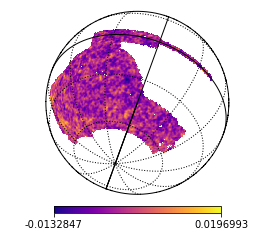

In [36]:
make_ball(map_kappa_des, cmap=pl.cm.plasma)

# CMB map

In [56]:
map_cmb = hp.read_map('example_maps_data/COM_CMB_IQU-commander_2048_R3.00_full.fits')
mask_cmb = hp.read_map('example_maps_data/COM_Mask_CMB-common-Mask-Pol_2048_R3.00.fits')
map_cmb[mask_cmb==0] = hp.UNSEEN

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


In [57]:
map_cmb = hp.ud_grade(map_cmb, nside_out=512)
sigma_arcmin = 60
sigma_rad = sigma_arcmin / 60. * np.pi / 180.
map_cmb = hp.smoothing(map_cmb, fwhm=sigma_rad)

Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


# SDSS galaxies map

In [77]:
map_sdss = hp.read_map('example_maps_data/sdss_galaxy_count.fits')
pixarea = hp.nside2pixarea(512, degrees=True)*(60**2)
map_sdss = map_sdss/pixarea
map_sdss[map_sdss==0]=hp.UNSEEN
print(map_sdss.max())
sigma_arcmin = 30
sigma_rad = sigma_arcmin / 60. * np.pi / 180.
map_sdss = hp.smoothing(map_sdss, fwhm=sigma_rad)

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
14.7849193899
Sigma is 12.739827 arcmin (0.003706 rad) 
-> fwhm is 30.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


# make figure

In [78]:
print(map_sdss.max(), map_sdss.min())
print(map_kappa_des.max(), map_kappa_des.min())

(7.737382154215549, -1.6374999999999999e+30)
(0.019699818151055877, -1.6374999999999999e+30)


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The inter

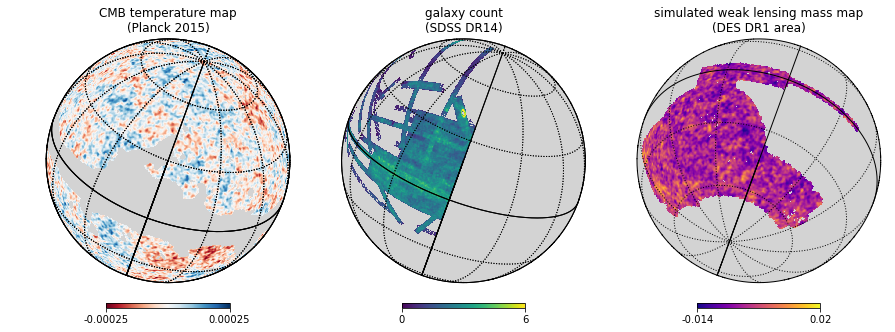

In [79]:
nx, ny = 3,1
pl.figure(figsize=(nx*5, ny*7))
pl.subplot(ny,nx,1)
make_ball(map_cmb, cmap=pl.cm.RdBu, clim=[-0.00025, 0.00025], title='CMB temperature map\n(Planck 2015)', rot=(0, 30, -20))
pl.subplot(ny,nx,2)
make_ball(map_sdss, cmap=pl.cm.viridis, title='galaxy count\n(SDSS DR14)', clim=[0, 6], rot=(0,20, -20))
pl.subplot(ny,nx,3)
make_ball(map_kappa_des, cmap=pl.cm.plasma, title='simulated weak lensing mass map\n(DES DR1 area)', clim=[-0.014, 0.02])
pl.subplots_adjust(wspace=0.01, hspace=0.01)
filename_plot = os.path.join('figure_example_maps.pdf')
pl.savefig(filename_plot, bbox_inches='tight'); print('saved {}'.format(filename_plot))

In [84]:
print(1./hp.nside2npix(1))
print(1./hp.nside2npix(2))
print(1./hp.nside2npix(4))

0.0833333333333
0.0208333333333
0.00520833333333


In [85]:
44000*0.005

220.0